In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# step 0: setup

### Conda environment

conda create --name week88 python = 3.6 scanpy jupyter
conda activate week88

### Getting data
We will be looking at a dataset containing ~10,000 brain cells from an E18 mouse. This was produced using the 10x technology, using their most recent (v3) chemistry.

What’s already been done: the CellRanger package from 10x was used to align and count the reads. Reads were de-duplicated using UMIs and separated into “cells” based on barcodes, and then aligned to a transcriptome (using the STAR aligner). The result is a cell x gene matrix, which has been stored in a binary format (an hdf5 file).

Data: https://bx.bio.jhu.edu/data/cmdb-lab/scrnaseq/neuron_10k_v3_filtered_feature_bc_matrix.h5

used wget

### Getting data into Scanpy
To get you started, all access to Scanpy is typically through a module call scanpy.api which is imported under the name sc for convenience. We then load the count matrix into a table, which is an instance of AnnData.

In [3]:
import scanpy as sc

In [4]:
# Read 10x dataset
adata = sc.read_10x_h5("files/neuron_10k_v3_filtered_feature_bc_matrix.h5")
# Make variable names (in this case the genes) unique
adata.var_names_make_unique()

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
/Users/cmdb/miniconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


# step 1: filtering
Filtering tools are largely under the sc.pp module. We suggest using the Zheng et al. 2017 filtering approach. Produce a PCA plot before and after filtering (see the sc.api.tl module to actually perform the PCA and sc.api.pl for plotting).

In [5]:
sc.tl.pca(adata)

/Users/cmdb/miniconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'feature_types' as categorical
... storing 'genome' as categorical


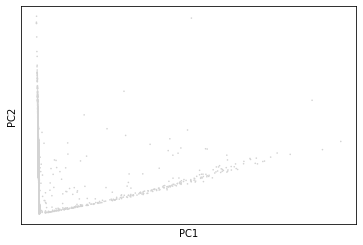

In [6]:
sc.pl.pca(adata)

In [7]:
sc.pp.recipe_zheng17(adata)

/Users/cmdb/miniconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/Users/cmdb/miniconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


In [8]:
sc.tl.pca(adata)

/Users/cmdb/miniconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


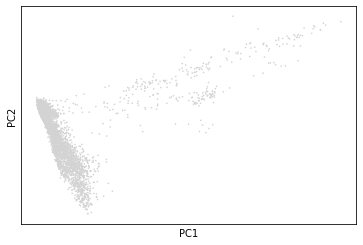

In [9]:
sc.pl.pca(adata)

# Step 2: Clustering
Use leiden clustering to identify clusters in the data. Produce t-SNE and UMAP plots showing the clusters.

In [10]:
sc.pp.neighbors(adata)

In [11]:
sc.tl.leiden(adata)

In [12]:
sc.tl.tsne(adata)

/Users/cmdb/miniconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


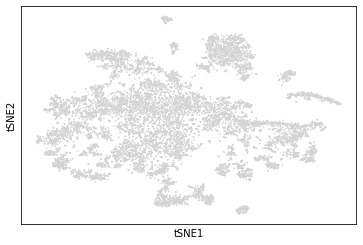

In [13]:
sc.pl.tsne(adata)

In [14]:
bulk_labels = sc.tl.umap(adata)

/Users/cmdb/miniconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


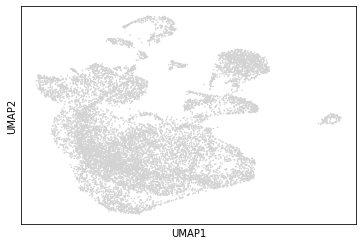

In [15]:
sc.pl.umap(adata)

# Step 3: Distinguishing genes
Identify and plot genes that distinguish each cluster. Use both the t-test and logistic regression approaches, implemented through the rank_genes_groups function.

In [16]:
gene_list = sc.tl.rank_genes_groups(adata, 'leiden', method = 't-test')

/Users/cmdb/miniconda3/envs/scanpy-v2/lib/python3.6/site-packages/scanpy/tools/_rank_genes_groups.py:408: RuntimeWarning: invalid value encountered in log2
  foldchanges[global_indices]


In [17]:
df = pd.DataFrame(gene_list)
df

""


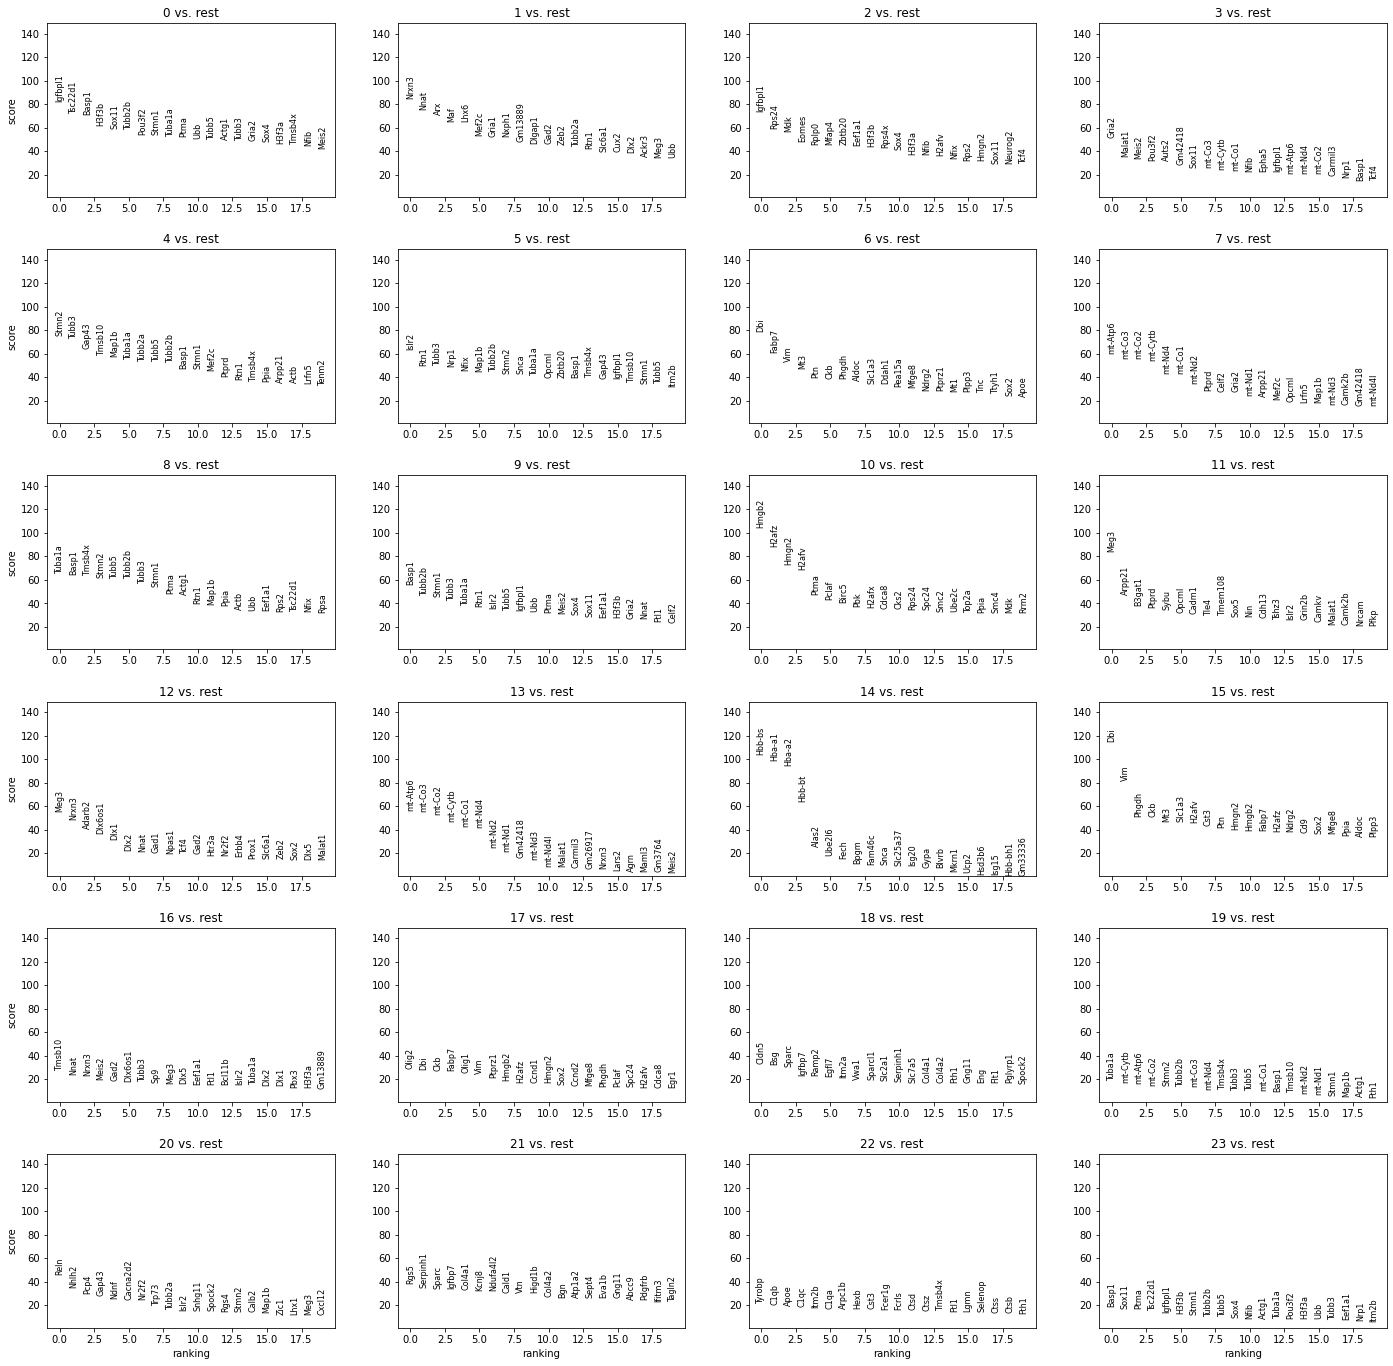

In [18]:
sc.pl.rank_genes_groups(adata)

# Step 4: Cell types?

In [19]:
#sc.pl.tsne(adata, color = 'Hmgb2')
#sc.pl.tsne(adata, color = 'Dbi')
#sc.pl.tsne(adata, color = 'Gria2')
#sc.pl.tsne(adata, color = 'Meg3')
#sc.pl.tsne(adata, color = 'Clu')


In [20]:
gene_list = []
for item in adata.var_names:
    gene_list.append(item)

In [21]:
gene_list

['Sox17',
 'Oprk1',
 'Ptpn18',
 '1500015O10Rik',
 'Col3a1',
 'Slc40a1',
 'Gm28826',
 'Cavin2',
 'Gm553',
 'Nrp2',
 'Gm4208',
 'Erbb4',
 'Gm29113',
 'Fn1',
 'Igfbp5',
 'Rufy4',
 'Vil1',
 'Wnt6',
 'Serpine2',
 'G530012D18Rik',
 'Sp110',
 'Sp140',
 'Ptma',
 'Prss56',
 'Inpp5d',
 'Ugt1a6a',
 'Glrp1',
 'Ackr3',
 'Gm29480',
 'Bcl2',
 'Serpinb5',
 'Dbi',
 'Gm29427',
 'Gm28892',
 'Rgs18',
 'Ncf2',
 'Sec16b',
 'F5',
 'Ildr2',
 'Rxrg',
 'Rgs5',
 'Rgs4',
 'Fcgr3',
 'Nr1i3',
 'Fcer1g',
 'Arhgap30',
 'F11r',
 'Pea15a',
 'Gm17224',
 'Atp1a2',
 'Tagln2',
 'Ifi204',
 'Gm16564',
 'H3f3a',
 'C130074G19Rik',
 'Cenpf',
 'Prox1',
 'Atf3',
 'Gm15872',
 'Cd34',
 'Gm13184',
 'Celf2',
 'Itih5',
 'Vim',
 'Gad2',
 'Nxph2',
 'Tor4a',
 'Fam166a',
 'Fcna',
 'Notch1',
 'Egfl7',
 'Adamtsl2',
 'Qrfp',
 'Eng',
 'Pbx3',
 'Lhx6',
 'Gm13431',
 'Ptgs1',
 'Olfr366',
 'Zeb2',
 'Gm13490',
 'Neb',
 'Gm13522',
 'Rprm',
 'Nr4a2',
 'Ly75',
 'Nostrin',
 'Spc25',
 'Gad1',
 'Dlx1',
 'Dlx2',
 'Sp9',
 '4930440I19Rik',
 'Ube2l6',
 'Apl

In [37]:
#astrocytes = "Aldoc"
#sc.pl.tsne(adata, color = 'Aldoc')
#sc.pl.umap(adata, color = 'Aldoc')
#sc.pl.tsne(adata, color = 'Clu')
#sc.pl.umap(adata, color = 'Clu')
#sc.pl.tsne(adata, color = 'Slc1a3')
#sc.pl.umap(adata, color = 'Slc1a3')

In [1]:
#OPCs
sc.pl.tsne(adata, color = 'Pdgfra')
sc.pl.umap(adata, color = 'Pdgfra')

NameError: name 'sc' is not defined

In [39]:
#neuron
#sc.pl.tsne(adata, color = 'Npy')
#sc.pl.tsne(adata, color = 'Sst')
#sc.pl.tsne(adata, color = 'Gad1')
#sc.pl.umap(adata, color = 'Npy')
#sc.pl.umap(adata, color = 'Sst')
#sc.pl.umap(adata, color = 'Gad1')

In [43]:
#microglia
#sc.pl.tsne(adata, color = 'Ccl4')
#sc.pl.tsne(adata, color = 'Ccl3')
#sc.pl.tsne(adata, color = 'Ctss')
#sc.pl.umap(adata, color = 'Ccl4')
#sc.pl.umap(adata, color = 'Ccl3')
#sc.pl.umap(adata, color = 'Ctss')

In [60]:
#endothelial cells 
#sc.pl.tsne(adata, color = 'Apold1')
#sc.pl.tsne(adata, color = 'Itm2a')
#sc.pl.tsne(adata, color = 'Bsg')
#sc.pl.umap(adata, color = 'Apold1')
#sc.pl.umap(adata, color = 'Itm2a')
#sc.pl.umap(adata, color = 'Bsg')

In [45]:
#astrocytes = "Aldoc"
#OPCs = 'Pdgfra'
#neuron = 'Sst'
#microglia = 'Ccl3'
#endothelial cells = 'Itm2a'
label_list1=['Aldoc','Pdgfra','Sst']
label_list2=['Ccl3','Itm2a']

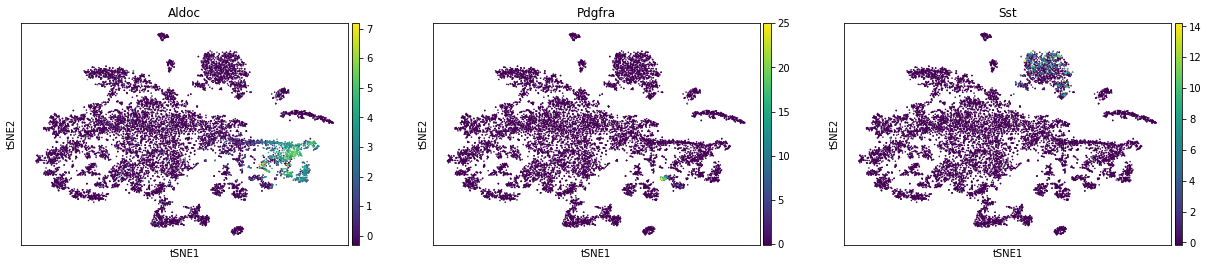

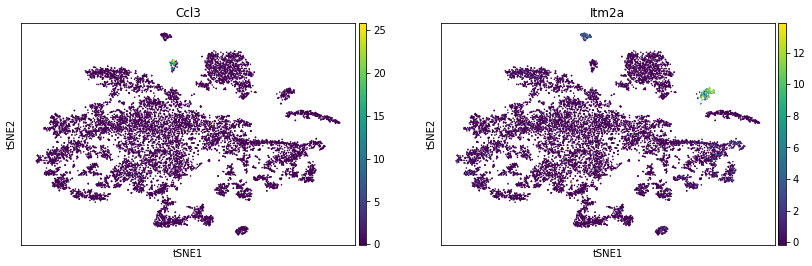

In [47]:
sc.pl.tsne(adata, color = label_list1)
sc.pl.tsne(adata, color = ['Ccl3','Itm2a'])


fig, axex = plt.subplots(4,2)
sc.pl.tsne(adata, ax = axes[0,0] )

plt.text('cell type', loc_x, loc_y)

In [50]:
sc.tl.leiden(adata, key_added='clusters', resolution=0.5)

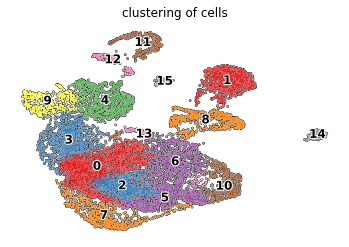

In [51]:

sc.pl.umap(adata, color='clusters', add_outline=True, legend_loc='on data',
           legend_fontsize=12, legend_fontoutline=2,frameon=False,
           title='clustering of cells', palette='Set1')

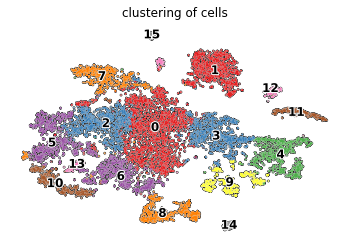

In [52]:
sc.pl.tsne(adata, color='clusters', add_outline=True, legend_loc='on data',
           legend_fontsize=12, legend_fontoutline=2,frameon=False,
           title='clustering of cells', palette='Set1')
# cluster 1 is neurons
# cluster 4 is astrocytes
# part of cluster 9 is OPCs
# pink cluster between 7 and 1 is microglia
# cluster 12 is endothelial cells 
# cluster 14 is Reln
# cluster 15 is Rgs5

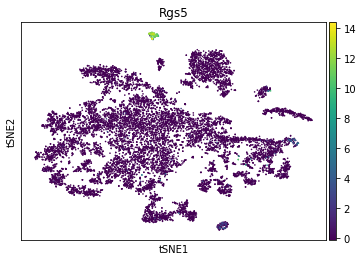

In [68]:
sc.pl.tsne(adata, color = 'Rgs5')
